<a href="https://colab.research.google.com/github/jkushida/Git_test/blob/master/%E9%9B%A2%E6%95%A3%E3%82%B3%E3%82%B5%E3%82%A4%E3%83%B3%E5%A4%89%E6%8F%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


class DCT:
	def __init__(self,N):
		self.N = N	# データ数．
		# 1次元，2次元離散コサイン変換の基底ベクトルをあらかじめ作っておく
		self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])
		
		# Nが大きいとメモリリークを起こすので注意
		# MNISTの28x28程度なら問題ない
		self.phi_2d = np.zeros((N,N,N,N))
		for i in range(N):
			for j in range(N):
				phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
				self.phi_2d[i,j] = phi_i*phi_j

	def dct(self,data):
		""" 1次元離散コサイン変換を行う """
		return self.phi_1d.dot(data)
	
	def idct(self,c):
		""" 1次元離散コサイン逆変換を行う """
		return np.sum( self.phi_1d.T * c ,axis=1)
	
	def dct2(self,data):
		""" 2次元離散コサイン変換を行う """
		return np.sum(self.phi_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)
	
	def idct2(self,c):
		""" 2次元離散コサイン逆変換を行う """
		return np.sum((c.reshape(N,N,1)*self.phi_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)
	
	def phi(self,k):
		""" 離散コサイン変換(DCT)の基底関数 """
		# DCT-II
		if k == 0:
			return np.ones(self.N)/np.sqrt(self.N)
		else:
			return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))



N = 10			# データの次元は10x10とする
dct = DCT(10)	# 離散コサイン変換を行うクラスを作成
# サンプル画像を作る
img = np.array([
  [0,0,0,0,0,0,0,0,0,0],
  [0,0,1,1,1,1,1,1,0,0],
  [0,1,0,0,0,0,0,0,1,0],
  [0,1,0,0,0,0,0,0,1,0],
  [0,0,0,0,0,0,1,1,0,0],
  [0,0,0,0,1,1,0,0,0,0],
  [0,0,0,1,0,0,0,0,0,0],
  [0,0,1,0,0,0,0,0,0,0],
  [0,1,1,1,1,1,1,1,1,0],
  [0,0,0,0,0,0,0,0,0,0]
])


c = dct.dct2(img)	# 2次元離散コサイン変換


# 摂動パターン
# 乱数で生成
a = np.random.uniform(-0.3, 0.3 , (10, 10))

# 摂動を加える
c = c + a

y = dct.idct2(c)	# 2次元離散コサイン逆変換

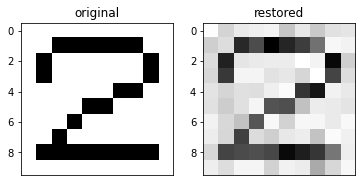

In [41]:
# 元の画像と復元したものを表示
plt.subplot(1,2,1)
plt.imshow(img,cmap="Greys")
plt.title("original")
plt.xticks([])
plt.subplot(1,2,2)
plt.imshow(y,cmap="Greys")
plt.title("restored")
plt.xticks([])
plt.show()
 